In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
order_item = pd.read_csv("../../../downloads/olist_redefined/order_item.tsv", sep='\t').drop_duplicates()
order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [3]:
order_product = order_item[['order_id','product_id', 'seller_id', 'price', 'freight_value']]
order_product

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [4]:
order_product.drop_duplicates().shape

(102425, 5)

In [5]:
order_product['product_id'].nunique()

32951

In [6]:
product = pd.read_csv("../../../downloads/olist_redefined/product.tsv", sep='\t').drop_duplicates()
product

,product_id,weight_g,length_cm,height_cm,width_cm,category
0,18ea29d5e42eea2c720cafb650f572f3,50.0,16.0,6.0,13.0,agro_industry_and_commerce
1,a79e27ad902bfc67386ea63ed1ef7a08,100.0,16.0,5.0,11.0,agro_industry_and_commerce
2,a0fe1efb855f3e786f0650268cd77f44,125.0,20.0,4.0,13.0,agro_industry_and_commerce
3,ac4bd2aec3f990363aa853e4f17709d3,150.0,18.0,8.0,13.0,agro_industry_and_commerce
4,a6bfd5412c292e6ab465ba7d7f794727,200.0,16.0,2.0,20.0,agro_industry_and_commerce
...,...,...,...,...,...,...
32946,8ef13bdd5d6da4bc50df1aaa486bf922,25800.0,34.0,84.0,54.0,NaN
32947,ea11e700a343582ad56e4c70e966cb36,26000.0,67.0,57.0,46.0,NaN
32948,ace8fb267a4f76c58dad79d0171f6812,26950.0,65.0,79.0,29.0,NaN
32949,ceeba7d5636e59173cc5f484e913db3d,30000.0,65.0,65.0,65.0,NaN


In [7]:
product['product_id'].nunique()

32951

In [8]:
order_product_info = order_product.merge(product, on='product_id', how='inner').drop_duplicates()
order_product_info

,order_id,product_id,seller_id,price,freight_value,weight_g,length_cm,height_cm,width_cm,category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,100.0,20.0,20.0,20.0,computers_accessories


In [9]:
order_product_info.isna().value_counts()

order_id  product_id  seller_id  price  freight_value  weight_g  length_cm  height_cm  width_cm  category
False     False       False      False  False          False     False      False      False     False       100964
                                                                                                 True          1445
                                                       True      True       True       True      True            15
                                                                                                 False            1
Name: count, dtype: int64

In [10]:
null_product_category = order_product_info[order_product_info['category'].isna()]
null_product_category_seller = null_product_category['seller_id'].unique()

In [11]:
order_info_of_null_product_category_seller = order_product_info[order_product_info['seller_id'].isin(null_product_category_seller)]
order_info_of_null_product_category_seller

,order_id,product_id,seller_id,price,freight_value,weight_g,length_cm,height_cm,width_cm,category
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,30000.0,50.0,30.0,40.0,pet_shop
39,0017afd5076e074a48f1f1a4c7bac9c5,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,809.10,44.29,3407.0,28.0,22.0,23.0,computers_accessories
48,001d8f0e34a38c37f7dba2a37d4eba8b,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78,150.0,43.0,13.0,14.0,health_beauty
65,00275bce676303c3bfd7292aefdfa223,6490b9f63b0b595e1c1402b46b0f50ad,99eaacc9e6046db1c82b163c5f84869f,279.90,13.46,300.0,18.0,10.0,13.0,telephony
99,0036887767dea4bd43b1a88cd0d9477a,3a264b078bf20e98f315ff65c23fa263,46dc3b2cc0980fb8ec44634e21d2718e,399.99,23.64,8100.0,30.0,36.0,46.0,toys
...,...,...,...,...,...,...,...,...,...,...
112581,ffd9fe7f21106081de852f98c6c78dca,b1cbf530dc2a793ced8e0768ffcce501,1ca7077d890b907f89be8c954a02686a,45.00,25.63,100.0,16.0,3.0,11.0,telephony
112585,ffdc30c0eaeed2e08818c4dad9806292,c3f6113d5b61bc95468432072b27e23d,897060da8b9a21f655304d50fd935913,18.90,15.10,300.0,36.0,9.0,11.0,computers_accessories
112592,ffde92ba447b33a47d1c04d203f10f41,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,278.00,26.70,5500.0,51.0,20.0,29.0,housewares
112618,ffed7e90414c1477a6b92554661d465f,550dc4417c636abc04c71404342de695,25c5c91f63607446a97b143d2d535d31,149.90,16.81,1238.0,34.0,19.0,24.0,computers_accessories


In [12]:
totl_selling_quantity_by_seller = order_info_of_null_product_category_seller.groupby('seller_id').agg({'product_id': 'count'})
totl_selling_quantity_by_seller.rename(columns={'product_id': "total_selling_produt_count"}, inplace=True)
totl_selling_quantity_by_seller.sort_values('total_selling_produt_count', ascending=False)

,total_selling_produt_count
seller_id,
f8db351d8c4c4c22c6835c19a46f01b0,670
391fc6631aebcf3004804e51b40bcf1e,547
46dc3b2cc0980fb8ec44634e21d2718e,527
53e4c6e0f4312d4d2107a8c9cddf45cd,485
4e922959ae960d389249c378d1c939f5,420
...,...
3bfad056cf05c00dabe2f895925d83b1,1
2f3d8b4c9e2ee165075331fea3f3095a,1
1a6245add4353f18ed55138808906979,1


In [13]:
totl_selling_quantity_by_seller[totl_selling_quantity_by_seller['total_selling_produt_count'] > 1].value_counts()

total_selling_produt_count
3                             28
2                             26
7                             11
11                            11
6                             10
                              ..
420                            1
485                            1
527                            1
547                            1
670                            1
Name: count, Length: 72, dtype: int64

In [14]:
tmp = order_info_of_null_product_category_seller.groupby('seller_id').agg({'category': 'nunique'}).sort_values('category')
tmp[tmp['category']==1]

,category
seller_id,
38e6dada03429a47197d5d584d793b41,1
3771c85bac139d2344864ede5d9341e3,1
4200ddf1967c5e41e48db62bc6d4b5ac,1
3f8034bfc6b8b4135534975d49f04c63,1
d9cb0052a666de5308b32f32ad5f1b1c,1
...,...
92c8bc6e8f925792247656fed09aad65,1
82e0a475a88cc9595229d8029273f045,1
8ca5b19e0263150d2c57afdde2b3d011,1


In [15]:
tmp = order_product_info[order_product_info.seller_id == "4e922959ae960d389249c378d1c939f5"]
tmp['category'].unique()

array(['telephony', 'agro_industry_and_commerce', 'computers_accessories',
       'pet_shop', 'consoles_games', 'auto', 'cool_stuff',
       'cds_dvds_musicals', 'electronics', nan, 'housewares',
       'sports_leisure', 'health_beauty', 'audio', 'fixed_telephony',
       'furniture_decor', 'watches_gifts', 'signaling_and_security',
       'garden_tools', 'christmas_supplies', 'musical_instruments',
       'security_and_services', 'food', 'home_appliances'], dtype=object)

판매자의 물품의 카테고리가 정의되어 있지 않은 경우에, 그 판매자가 판매 중인 모든 제품의 카테고리와 크기, 무게를 비교하여 넣으려고 했으나, 완벽한(100%) 추정이 아니므로 제외 결정

In [16]:
clean_order_product_info = order_product_info.dropna()
clean_order_product_info

,order_id,product_id,seller_id,price,freight_value,weight_g,length_cm,height_cm,width_cm,category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,100.0,20.0,20.0,20.0,computers_accessories


In [17]:
# 판매 가격 변동이 있는 제품. 원인은 모름
tmp = clean_order_product_info.groupby('product_id', as_index=False).agg(price_count=('price', 'nunique'))
price_changed = tmp[tmp['price_count'] > 1]
price_changed.shape


(5832, 2)

In [18]:
price_changed['price_count'].value_counts()

price_count
2     4071
3     1036
4      383
5      141
6       75
7       44
8       30
9       10
13       7
10       7
12       6
11       6
21       3
20       2
17       2
23       2
14       2
16       1
31       1
15       1
29       1
27       1
Name: count, dtype: int64

In [19]:
# 동일 상품을 여러 판매자가 판매하는 경우도 있음
max_price_changed_product_id = price_changed[price_changed['price_count'] == 27]['product_id'].values[0]
order_product_info[order_product_info['product_id'] == max_price_changed_product_id]['seller_id'].unique()

array(['7d13fca15225358621be4086e1eb0964',
       '4869f7a5dfa277a7dca6462dcf3b52b2',
       '7e93a43ef30c4f03f38b393420bc753a',
       '2eb70248d66e0e3ef83659f71b244378',
       'fa1c13f2614d7b5c4749cbc52fecda94'], dtype=object)

In [20]:
price_dist = clean_order_product_info['price'].value_counts()
price_dist

price
59.90      2122
69.90      1836
49.90      1683
89.90      1445
99.90      1341
           ... 
25.86         1
1019.49       1
217.99        1
288.02        1
147.01        1
Name: count, Length: 5901, dtype: int64

# sales

In [21]:
clean_orders = clean_order_product_info.drop(columns=['weight_g','length_cm','height_cm','width_cm'])
# clean_orders['selling_price'] = clean_orders['price'] + clean_orders['freight_value']
clean_orders['selling_price'] = clean_orders['price']
clean_orders

,order_id,product_id,seller_id,price,freight_value,category,selling_price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture_decor,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden_tools,199.90
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,housewares,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,computers_accessories,350.00
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,sports_leisure,99.90
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,computers_accessories,55.99


In [22]:
order_status = pd.read_csv("../../../downloads/olist_redefined/order_status.tsv", sep='\t').drop_duplicates()
complete_order = order_status[order_status['status'] == 'delivered_customer']
complete_order

,order_id,status,timestamp
704,36989eb07a0de2d3d3129eea35553875,delivered_customer,2016-10-11 13:46:32.000000
705,7033745709b7cf1bac7d2533663592de,delivered_customer,2016-10-11 14:46:49.000000
745,d1eb8e4e276a4eea13a5c462c0765e60,delivered_customer,2016-10-13 03:10:34.000000
747,92b44b87f1f7670b8911c5f0e642435e,delivered_customer,2016-10-13 07:45:48.000000
753,ac2b7c522d811acba0aa270ed3e112e4,delivered_customer,2016-10-13 15:44:27.000000
...,...,...,...
395817,7d09831e67caa193da82cfea3bee7aa5,delivered_customer,2018-09-25 00:47:25.000000
395820,a2b4be96b53022618030c17ed437604d,delivered_customer,2018-09-27 02:24:33.000000
395826,b2997e1d7061605e9285496c581d1fbd,delivered_customer,2018-10-02 00:18:50.000000
395830,450cb96c63e1e5b49d34f223f67976d2,delivered_customer,2018-10-11 16:41:14.000000


In [23]:
payment = pd.read_csv("../../../downloads/olist_redefined/payment.tsv", sep='\t').drop_duplicates()
complete_payment = payment[payment['order_id'].isin(complete_order['order_id'])]
complete_payment = complete_payment.sort_values(['order_id', 'payment_sequential']).drop_duplicates()
complete_payment

,timestamp,order_id,customer_id,payment_sequential,payment_installments,payment_type,payment_value
26545,2017-09-13 08:59:02,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,1,2,credit_card,72.19
8058,2017-04-26 10:53:06,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,1,3,credit_card,259.83
51008,2018-01-14 14:33:31,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,1,5,credit_card,216.87
99468,2018-08-08 10:00:35,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,1,2,credit_card,25.78
1433,2017-02-04 13:57:51,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,1,3,credit_card,218.04
...,...,...,...,...,...,...,...
75247,2018-04-23 13:57:06,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,1,1,boleto,343.40
92815,2018-07-14 10:26:46,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,1,1,boleto,386.53
32866,2017-10-23 17:07:56,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,1,3,credit_card,116.85
22214,2017-08-14 23:02:59,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,1,3,credit_card,64.71


In [24]:
complete_revenue = complete_payment.groupby('order_id', as_index=False).agg(revenue=('payment_value', 'sum'))
complete_revenue

,order_id,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
96478,fffc94f6ce00a00581880bf54a75a037,343.40
96479,fffcd46ef2263f404302a634eb57f7eb,386.53
96480,fffce4705a9662cd70adb13d4a31832d,116.85
96481,fffe18544ffabc95dfada21779c9644f,64.71


In [25]:
complete_sales = clean_orders[clean_orders['order_id'].isin(complete_revenue['order_id'])]
complete_sales.sort_values(['order_id', 'product_id'])

,order_id,product_id,seller_id,price,freight_value,category,selling_price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture_decor,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden_tools,199.90
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,housewares,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,computers_accessories,350.00
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,sports_leisure,99.90
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,computers_accessories,55.99


In [26]:
total_sales_by_category = complete_sales.groupby('category', as_index=False).agg(total_selling_price=('selling_price', 'sum'))
total_sales_by_category = total_sales_by_category.sort_values('total_selling_price', ascending=False)
total_sales_by_category['proportion'] = total_sales_by_category['total_selling_price'] / total_sales_by_category['total_selling_price'].sum() * 100

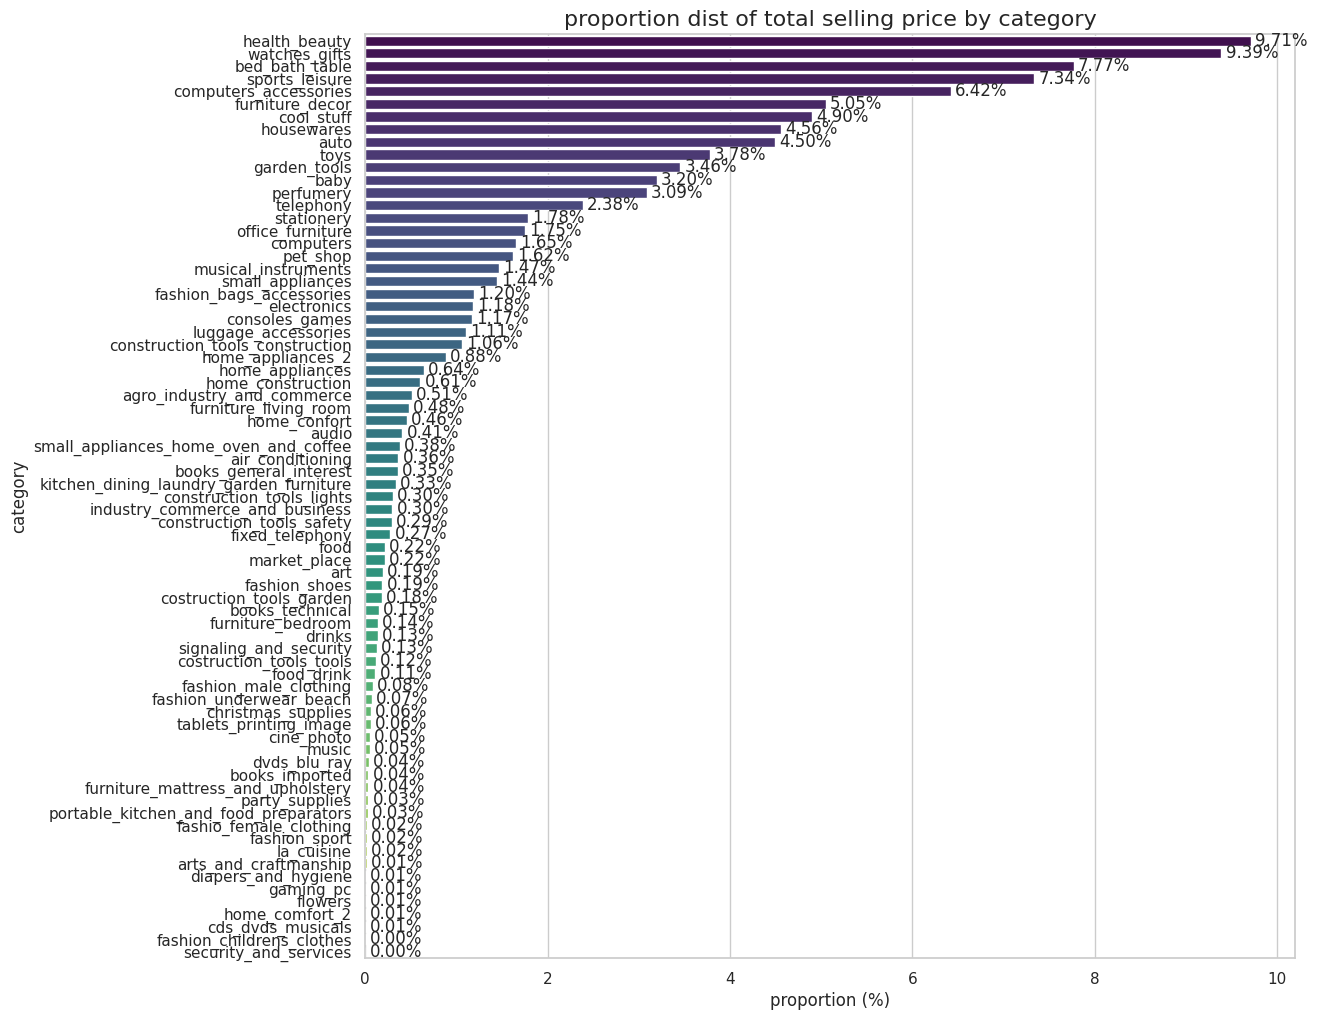

In [27]:
plt.figure(figsize=(12, 12))

ax = sns.barplot(
    x='proportion',
    y='category',
    data=total_sales_by_category,
    palette='viridis',
    hue='category',
    legend=False
)
labels = [f'{p:.2f}%' for p in total_sales_by_category['proportion']]

for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], padding=3)

plt.title('proportion dist of total selling price by category', fontsize=16)
plt.xlabel('proportion (%)', fontsize=12)
plt.ylabel('category', fontsize=12)

plt.show()

In [28]:
total_sales_by_category['cumsum'] = total_sales_by_category['proportion'].cumsum()
total_sales_by_category

,category,total_selling_price,proportion,cumsum
44,health_beauty,1188686.20,9.714369,9.714369
72,watches_gifts,1148927.22,9.389444,19.103813
7,bed_bath_table,950646.14,7.769020,26.872834
67,sports_leisure,897643.53,7.335864,34.208698
15,computers_accessories,785455.57,6.419024,40.627721
...,...,...,...,...
35,flowers,962.94,0.007869,99.982625
47,home_comfort_2,682.87,0.005581,99.988205
11,cds_dvds_musicals,640.00,0.005230,99.993436
29,fashion_childrens_clothes,519.95,0.004249,99.997685


In [29]:
proportion = 80
top_80_dist = total_sales_by_category[total_sales_by_category['cumsum'] <= proportion]
top_80_dist

,category,total_selling_price,proportion,cumsum
44,health_beauty,1188686.20,9.714369,9.714369
72,watches_gifts,1148927.22,9.389444,19.103813
7,bed_bath_table,950646.14,7.769020,26.872834
67,sports_leisure,897643.53,7.335864,34.208698
15,computers_accessories,785455.57,6.419024,40.627721
39,furniture_decor,618202.57,5.052173,45.679894
20,cool_stuff,599475.92,4.899132,50.579026
50,housewares,558413.92,4.563558,55.142584
5,auto,550451.20,4.498484,59.641068
71,toys,462608.76,3.780604,63.421672


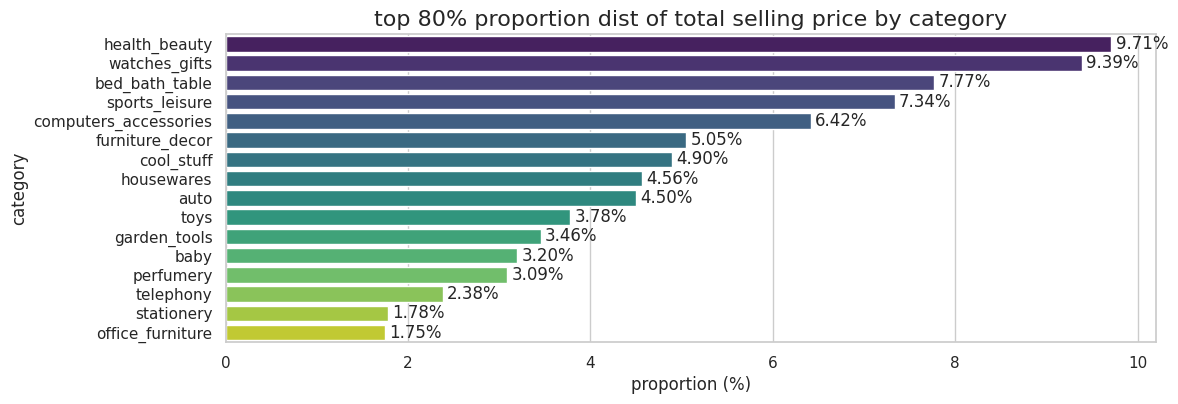

In [30]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(
    x='proportion',
    y='category',
    data=top_80_dist,
    palette='viridis',
    hue='category',
    legend=False
)
labels = [f'{p:.2f}%' for p in top_80_dist['proportion']]

for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], padding=3)

plt.title(f'top {proportion}% proportion dist of total selling price by category', fontsize=16)
plt.xlabel('proportion (%)', fontsize=12)
plt.ylabel('category', fontsize=12)

plt.show()

In [31]:
# health_beauty 카테고리에서 제품별 비중
health_beauty_order = complete_sales[complete_sales['category'] == 'health_beauty']
health_beauty_order

,order_id,product_id,seller_id,price,freight_value,category,selling_price
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,145.95,11.65,health_beauty,145.95
10,00061f2a7bc09da83e415a52dc8a4af1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,8.88,health_beauty,59.99
48,001d8f0e34a38c37f7dba2a37d4eba8b,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78,health_beauty,18.99
53,001e7cf2ad6bef3ade12ebc56ceaf0f3,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,35.90,15.20,health_beauty,35.90
70,0029c5db35ef291ce99d1262012e7daa,7614c62b86a81021243e438cfde78ccc,900ba814c251a692506d7834c1218441,492.75,21.62,health_beauty,492.75
...,...,...,...,...,...,...,...
112566,ffce8a2dd7579795f5c1cbe2bf23d51d,00878d953636afec00d3e85d55a12e7f,955fee9216a65b617aa5c0531780ce60,100.00,26.78,health_beauty,100.00
112589,ffdd178654127ccf34a439e8704fecd9,16b4473e98422039c388f144a0b16f55,4de6e4ba574aa9dfdc824bc44dc47fdd,69.90,38.71,health_beauty,69.90
112595,ffe146c862ce518ad378598499bf9204,8ab83b53b9a953395f4f21f0b1a845ef,431050a06a317f2b38168dec3dcd2b46,83.80,18.69,health_beauty,83.80
112614,ffec1a6d35149778ec575d5048d44db8,437c05a395e9e47f9762e677a7068ce7,f84fa566034f5e8e880a07ec624c56af,47.65,7.39,health_beauty,47.65


In [32]:
popular_product = health_beauty_order.groupby('product_id', as_index=False).agg(total_selling_price=('selling_price', 'sum'), order_count=('order_id', 'count')).sort_values('total_selling_price', ascending=False)
popular_product['avg_price'] = popular_product['total_selling_price'] / popular_product['order_count']
popular_product['total_selling_price_cumsum'] = popular_product['total_selling_price'].cumsum()
popular_product['total_selling_price_proportion'] = popular_product['total_selling_price'] / popular_product['total_selling_price'].sum()
popular_product['total_selling_price_proportion_cumsum'] = popular_product['total_selling_price_proportion'].cumsum()
popular_product

,product_id,total_selling_price,order_count,avg_price,total_selling_price_cumsum,total_selling_price_proportion,total_selling_price_proportion_cumsum
1742,bb50f2e236e5eea0100680137654686c,60920.00,186,327.526882,60920.00,0.051250,0.051250
1000,6cdd53843498f92890544667809f1595,51888.70,148,350.599324,112808.70,0.043652,0.094902
408,2b4609f8948be18874494203496bc318,22187.28,254,87.351496,134995.98,0.018665,0.113567
257,19c91ef95d509ea33eda93495c4d3481,18532.47,153,121.127255,153528.45,0.015591,0.129158
1158,7c1bd920dbdf22470b68bde975dd3ccf,12833.86,214,59.971308,166362.31,0.010797,0.139955
...,...,...,...,...,...,...,...
138,0e6e9a3510d7c927145921c00077a726,6.00,1,6.000000,1188677.10,0.000005,0.999992
2057,da86f3242cb55a55dd9cd7b19d951685,4.50,1,4.500000,1188681.60,0.000004,0.999996
647,46fce52cef5caa7cc225a5531c946c8b,2.20,1,2.200000,1188683.80,0.000002,0.999998
374,270516a3f41dc035aa87d220228f844c,1.20,1,1.200000,1188685.00,0.000001,0.999999


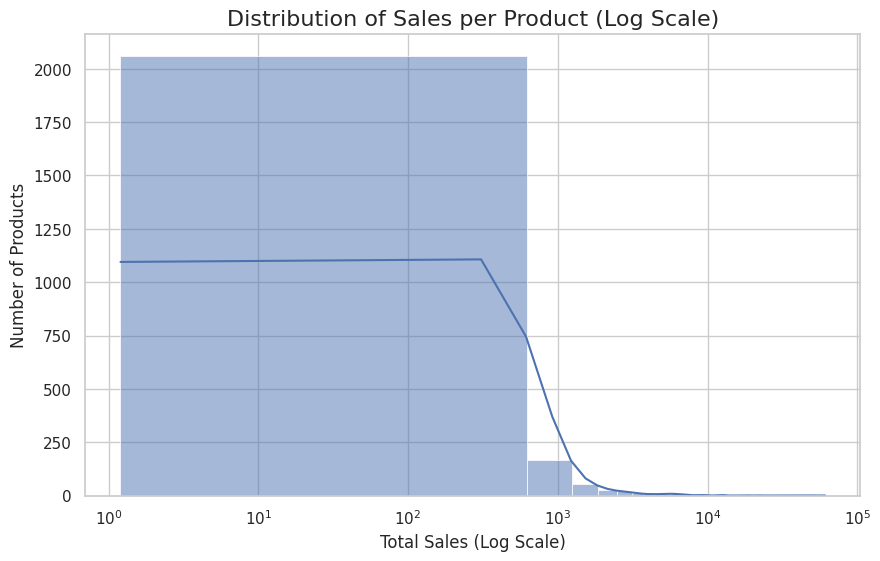

In [33]:
# 2. Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=popular_product, x='total_selling_price', kde=True)

# Set the x-axis to a logarithmic scale for better visibility
plt.xscale('log')

# 3. Set titles and labels in English
plt.title('Distribution of Sales per Product (Log Scale)', fontsize=16)
plt.xlabel('Total Sales (Log Scale)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(True)
plt.show()

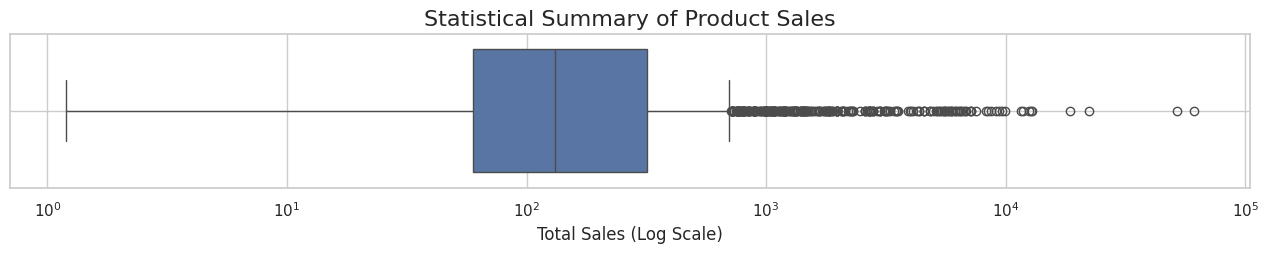

In [34]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=popular_product['total_selling_price'])

# Set the y-axis to a logarithmic scale
plt.xscale('log')

# Set titles and labels in English
plt.title('Statistical Summary of Product Sales', fontsize=16)
plt.xlabel('Total Sales (Log Scale)', fontsize=12)
plt.grid(True)
plt.show()

In [35]:
popular_product_sorted = popular_product.sort_values('total_selling_price', ascending=False).reset_index(drop=True)
total_products = len(popular_product_sorted)
popular_product_sorted['product_rank'] = popular_product_sorted.index + 1
popular_product_sorted['rank_proportion'] = popular_product_sorted['product_rank'] / total_products
popular_product_sorted

,product_id,total_selling_price,order_count,avg_price,total_selling_price_cumsum,total_selling_price_proportion,total_selling_price_proportion_cumsum,product_rank,rank_proportion
0,bb50f2e236e5eea0100680137654686c,60920.00,186,327.526882,60920.00,0.051250,0.051250,1,0.000417
1,6cdd53843498f92890544667809f1595,51888.70,148,350.599324,112808.70,0.043652,0.094902,2,0.000834
2,2b4609f8948be18874494203496bc318,22187.28,254,87.351496,134995.98,0.018665,0.113567,3,0.001252
3,19c91ef95d509ea33eda93495c4d3481,18532.47,153,121.127255,153528.45,0.015591,0.129158,4,0.001669
4,7c1bd920dbdf22470b68bde975dd3ccf,12833.86,214,59.971308,166362.31,0.010797,0.139955,5,0.002086
...,...,...,...,...,...,...,...,...,...
2392,0e6e9a3510d7c927145921c00077a726,6.00,1,6.000000,1188677.10,0.000005,0.999992,2393,0.998331
2393,da86f3242cb55a55dd9cd7b19d951685,4.50,1,4.500000,1188681.60,0.000004,0.999996,2394,0.998748
2394,46fce52cef5caa7cc225a5531c946c8b,2.20,1,2.200000,1188683.80,0.000002,0.999998,2395,0.999166
2395,270516a3f41dc035aa87d220228f844c,1.20,1,1.200000,1188685.00,0.000001,0.999999,2396,0.999583


In [36]:
total_sals_top_80_per = popular_product_sorted[popular_product_sorted['total_selling_price_proportion_cumsum'] <= 0.8]
total_sals_top_80_per

,product_id,total_selling_price,order_count,avg_price,total_selling_price_cumsum,total_selling_price_proportion,total_selling_price_proportion_cumsum,product_rank,rank_proportion
0,bb50f2e236e5eea0100680137654686c,60920.00,186,327.526882,60920.00,0.051250,0.051250,1,0.000417
1,6cdd53843498f92890544667809f1595,51888.70,148,350.599324,112808.70,0.043652,0.094902,2,0.000834
2,2b4609f8948be18874494203496bc318,22187.28,254,87.351496,134995.98,0.018665,0.113567,3,0.001252
3,19c91ef95d509ea33eda93495c4d3481,18532.47,153,121.127255,153528.45,0.015591,0.129158,4,0.001669
4,7c1bd920dbdf22470b68bde975dd3ccf,12833.86,214,59.971308,166362.31,0.010797,0.139955,5,0.002086
...,...,...,...,...,...,...,...,...,...
483,2172cc642285306d7cc942de518173a2,402.35,1,402.350000,949005.18,0.000338,0.798365,484,0.201919
484,046cf43a5b63303b3c3c4ba076d1d732,401.00,3,133.666667,949406.18,0.000337,0.798702,485,0.202336
485,23f52db82a2a0f55b0a1c1ae5b696013,400.00,2,200.000000,949806.18,0.000337,0.799039,486,0.202753
486,e604bde09d664bc81fa08c40480c94a6,399.99,1,399.990000,950206.17,0.000336,0.799375,487,0.203171


In [37]:
total_sals_top_80_per.iloc[-1]

product_id                               fe7d52482b17e6b3466f4b8f3ce51a9e
total_selling_price                                                399.92
order_count                                                             8
avg_price                                                           49.99
total_selling_price_cumsum                                      950606.09
total_selling_price_proportion                                   0.000336
total_selling_price_proportion_cumsum                            0.799712
product_rank                                                          488
rank_proportion                                                  0.203588
Name: 487, dtype: object

In [38]:
product_rank_proportion_top_80_perc = total_sals_top_80_per.iloc[-1]['rank_proportion']
cumul_sales_proportion_top_80_per = total_sals_top_80_per.iloc[-1]['total_selling_price_proportion_cumsum']

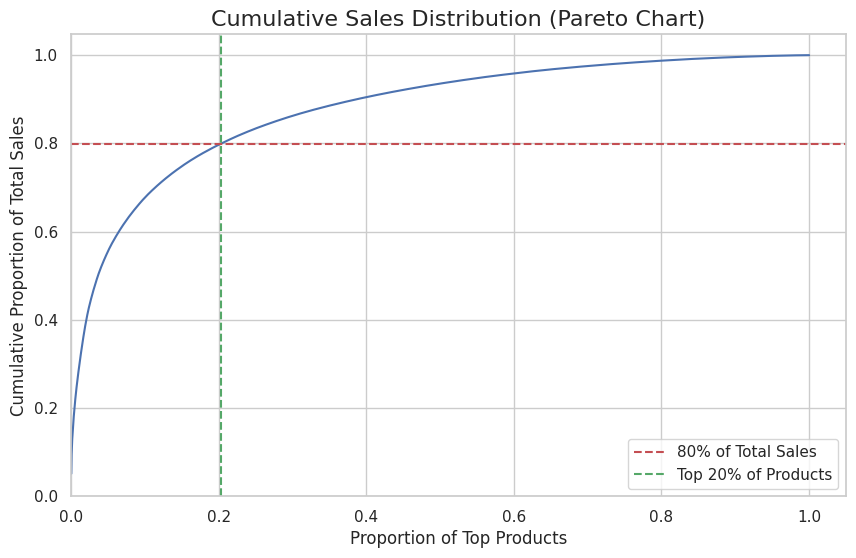

In [39]:
total_products = len(popular_product_sorted)

# --- 올바른 파레토 차트 시각화 ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# X축: 제품의 누적 '비율'
# Y축: 매출의 누적 '비율' (파일에 있는 cumsum 열 사용)
sns.lineplot(
    x='rank_proportion',
    y='total_selling_price_proportion_cumsum',
    data=popular_product_sorted
)

plt.xlim(0)
plt.ylim(0)

plt.axhline(y=cumul_sales_proportion_top_80_per, color='r', linestyle='--', label='80% of Total Sales')
plt.axvline(x=product_rank_proportion_top_80_perc, color='g', linestyle='--', label='Top 20% of Products')

plt.title('Cumulative Sales Distribution (Pareto Chart)', fontsize=16)
plt.xlabel('Proportion of Top Products', fontsize=12)
plt.ylabel('Cumulative Proportion of Total Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()